In [221]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [38]:
# Loading the training dataset
dataset = torchvision.datasets.MNIST(root='./data',train = True, download=True,transform = torchvision.transforms.ToTensor())

# data gets loaded in the train_dataset variable
# root parameter specifies the loacation where the data exists/has to be downloaded to
# download parameter being set as 'True' instructs to download the MNIST dataset if not present in the root specified location
# transfrom parameter transforms the dataset to the specified datatype, here it is torch.FloatTensor and the values are scaled down to [0,1]

In [39]:
print(type(dataset))           # printing datatype of 'training_dataset'
print(dataset)                 # printing 'training_dataset'
print(type(dataset[0]))        # printing datatype of what is stored at index 0 in the 'training_dataset'
print(dataset[0])              # printing what is present at index 0 in the 'training_dataset'

<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
<class 'tuple'>
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.

In [40]:
# printing the first 10 tensors along with there corresponding labels
for i in range(10) :
    print(f"tensors for image {i+1} with label {dataset[i][1]} : \n{dataset[i][0]} ")

tensors for image 1 with label 5 : 
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0

In [41]:
# printing the first 10 labels seperately :
for i in range(10) :
    print(f"label for image {i+1} : {dataset[i][1]}")

label for image 1 : 5
label for image 2 : 0
label for image 3 : 4
label for image 4 : 1
label for image 5 : 9
label for image 6 : 2
label for image 7 : 1
label for image 8 : 3
label for image 9 : 1
label for image 10 : 4


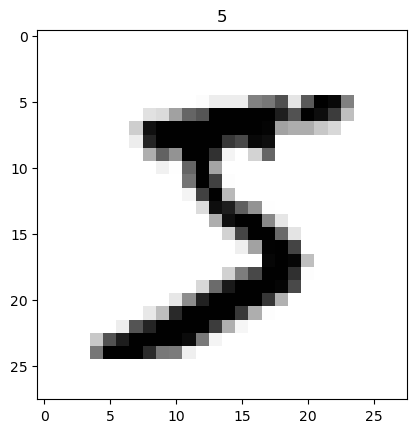

----------------------------------------------------


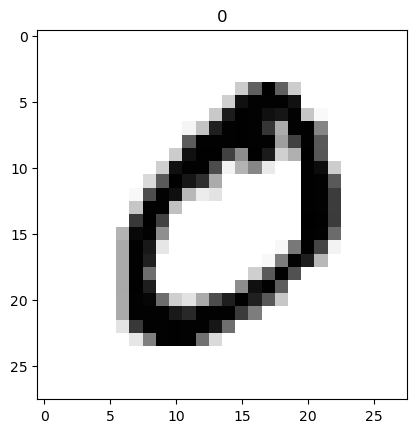

----------------------------------------------------


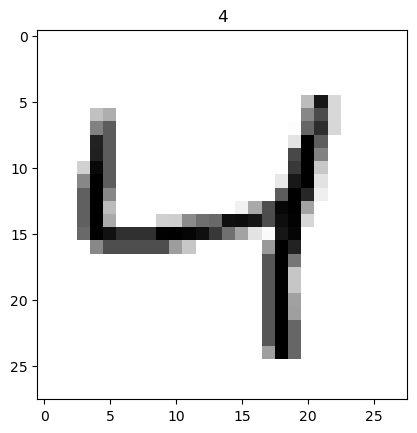

----------------------------------------------------


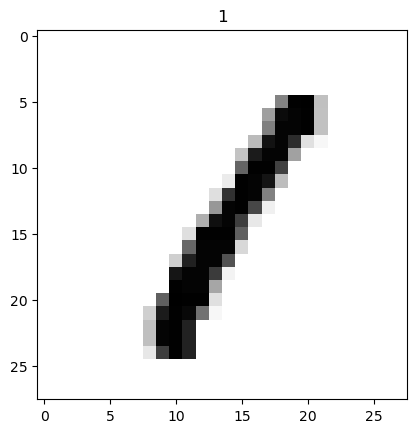

----------------------------------------------------


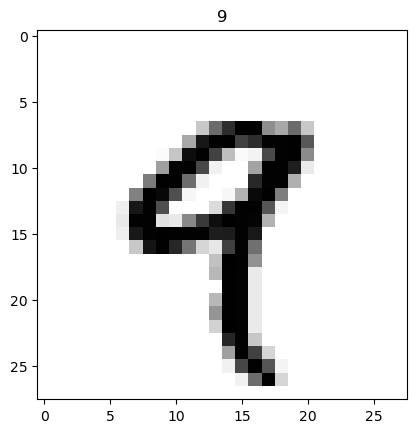

----------------------------------------------------


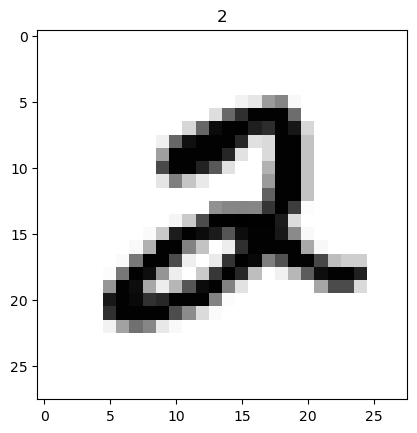

----------------------------------------------------


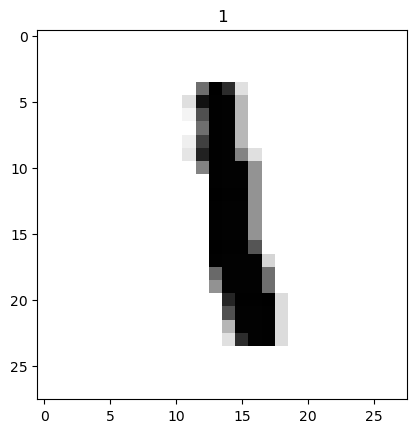

----------------------------------------------------


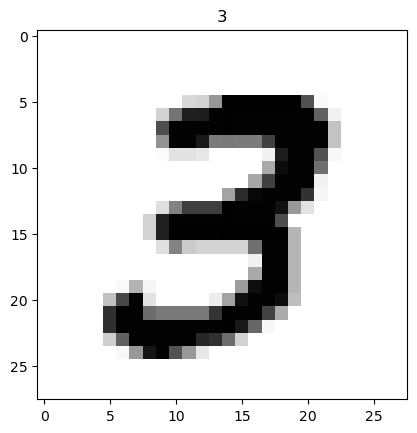

----------------------------------------------------


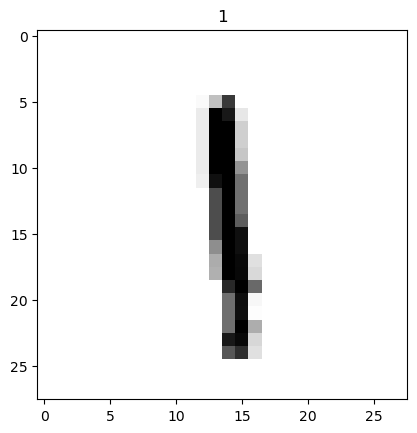

----------------------------------------------------


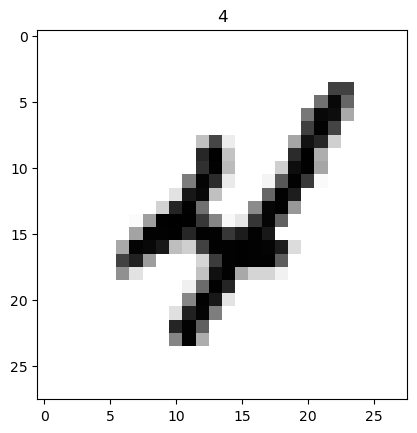

----------------------------------------------------


In [42]:
# using matplotlib to print the first 10 image 
for i in range(10) :

    pixel_values = dataset[i][0][0]       # selecting the tensor that stores the pixel-information of the 'i'th image

# displaying the grayscale image using matplotlib.pyplot
    plt.imshow(pixel_values, cmap='gray_r', vmin=0, vmax=1)
    plt.title(dataset[i][1])
    plt.axis('on')
    plt.show()
    print("----------------------------------------------------")
    
# values on top of the image correspond to the label for that image

In [43]:
# flattening the images :

# defining flatten function which takes in a 1 x 28 x 28 tensor and returns a tranformed 2D tensor with shape (1,784)  
def flatten(x) :
    a = torch.empty(0)
    for i in range(28) :
        a = torch.cat((a,x[0,i]))
    return a

# defining X_train, which is the matrix which will contain all 60k datapoints, which we will be using to training our model
X_train = torch.empty(60000,784)

for i in range(60000):
    X_train[i] = flatten(dataset[i][0])

print(X_train.shape)        # it is supposed to have a shape (60000,784)

torch.Size([60000, 784])


In [44]:
# printing first 5 datapoints/rows from X_train :
for i in range(5) :
    print(f"Row {i+1} : {X_train[i]}")

Row 1 : tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 

In [45]:
# defining y_train which will store the correct labels corresponding to data-tensors in X_train
y_train = torch.empty(60000,1,dtype = torch.int32)
for i in range(60000):
    y_train[i] = dataset[i][1]
   
print(y_train.shape)   # it is supposed to have a shape (60000,1)

torch.Size([60000, 1])


In [46]:
# Normalization : it is done for all features independently
# We'll be simply dividing each entry of all the feature columns(784) by the respective maximum value which that feature takes
# uncomment code below to run Normalization :
'''
 for i in range(784) :
     X_train[:,i] /= X_train[:,i].max().item()
'''

'\n for i in range(784) :\n     X_train[:,i] /= X_train[:,i].max().item()\n'

In [47]:
# checking for missing values in X_train and Y_train :
# if any exists, then I'll be removing that datapoint from both X_train and y_train
# NOTE : this may take a minute as all the values in X_train and y_train are being checked
for i in range(len(y_train)) : 
    if (y_train[i].item() == None) :                                
        y_train = torch.cat((y_train[0:i],y_train[i+1,len(y_train)]), axis = 0)
        X_train = torch.cat((X_train[0:i],X_train[i+1,len(X_train)]), axis = 0)
        continue
    for j in range(X_train.shape[1]) :
        if (X_train[i,j].item() == None) : 
            y_train = torch.cat((y_train[0:i],y_train[i+1,len(y_train)]), axis = 0)
            X_train = torch.cat((X_train[0:i],X_train[i+1,len(X_train)]), axis = 0)
            break

In [48]:
print(X_train.shape)
print(y_train.shape)    
# if X_train.shape : [60000,784] and y_train.shape : [60000,1] => no missing values in data

torch.Size([60000, 784])
torch.Size([60000, 1])


In [49]:
# distribution of labels :
Total_count = 0
for i in range(10) :
    count = torch.eq(y_train, i).sum().item()     
    Total_count += count;
    print(f"No. of data points with true label {i} are {count}")
print(f"Total count : {Total_count}")    

No. of data points with true label 0 are 5923
No. of data points with true label 1 are 6742
No. of data points with true label 2 are 5958
No. of data points with true label 3 are 6131
No. of data points with true label 4 are 5842
No. of data points with true label 5 are 5421
No. of data points with true label 6 are 5918
No. of data points with true label 7 are 6265
No. of data points with true label 8 are 5851
No. of data points with true label 9 are 5949
Total count : 60000


Some samples with label 0 are : 


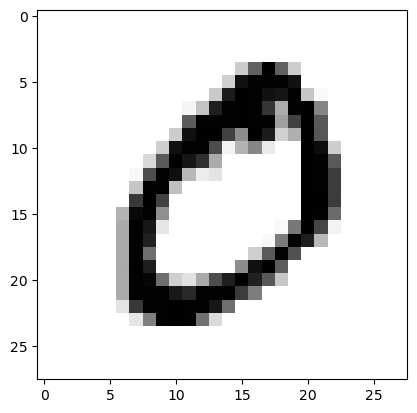

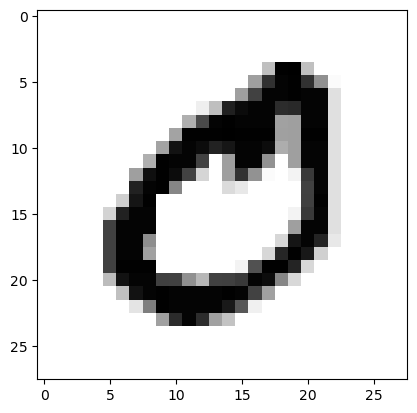

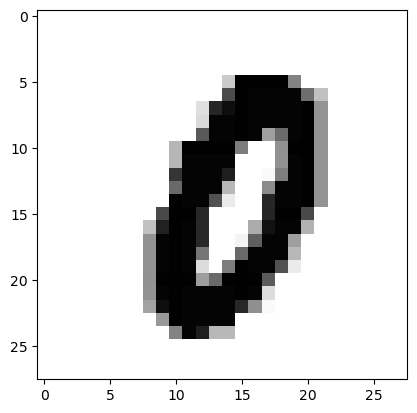

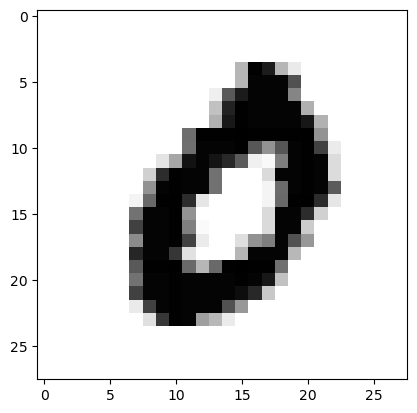

------------------------------

Some samples with label 1 are : 


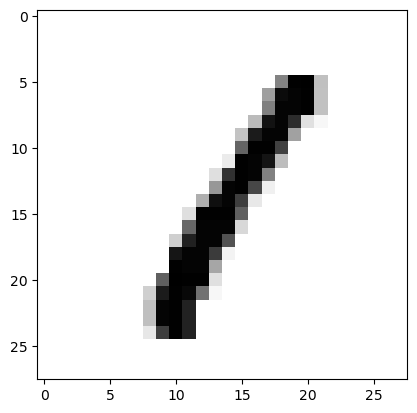

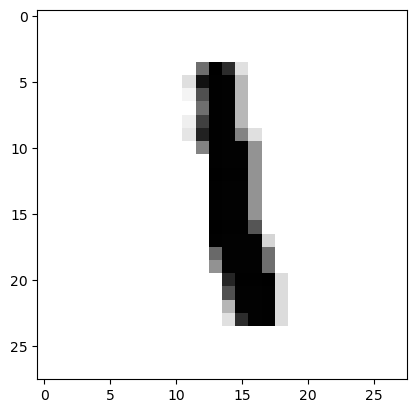

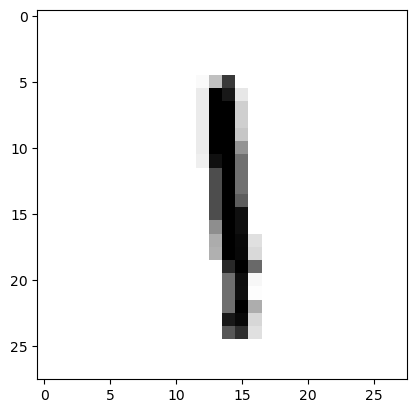

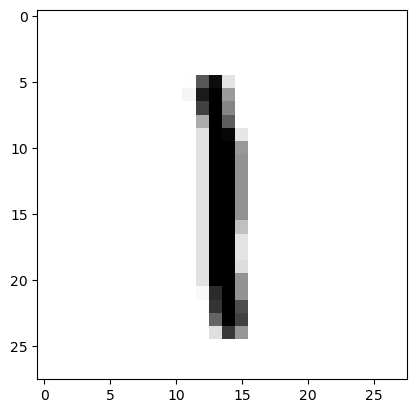

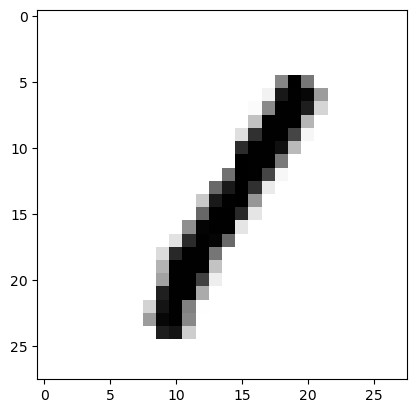

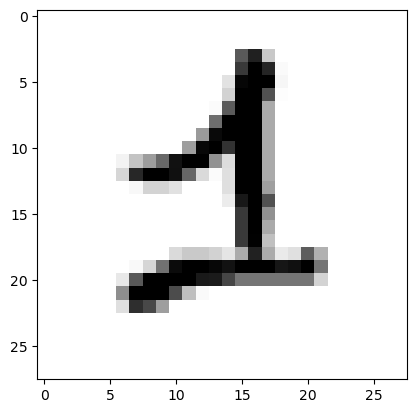

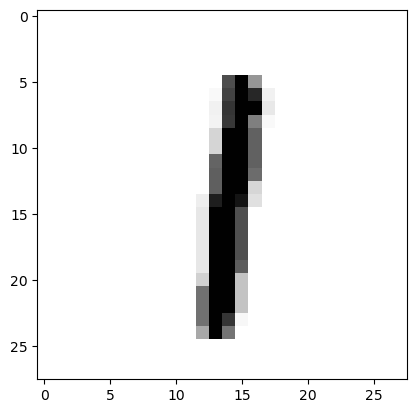

------------------------------

Some samples with label 2 are : 


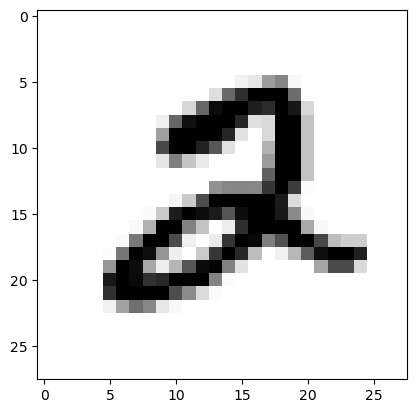

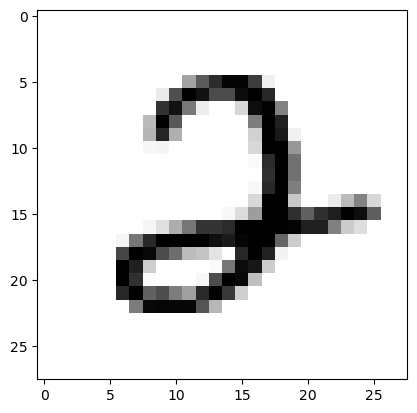

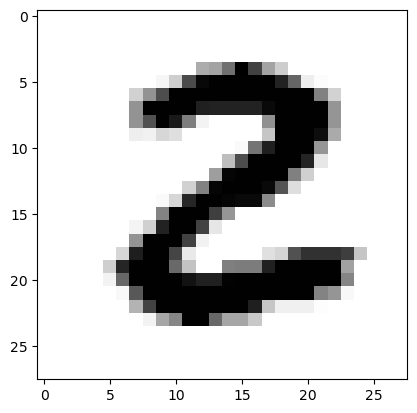

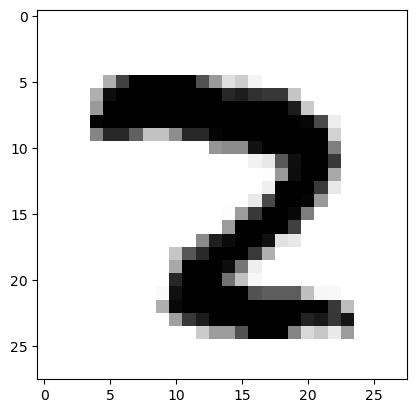

------------------------------

Some samples with label 3 are : 


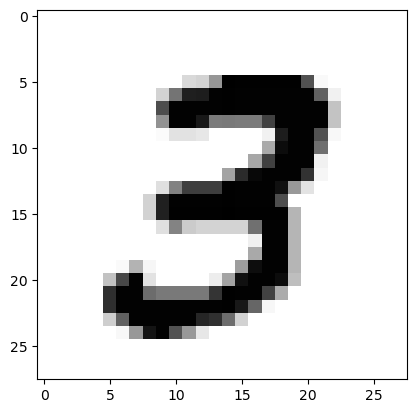

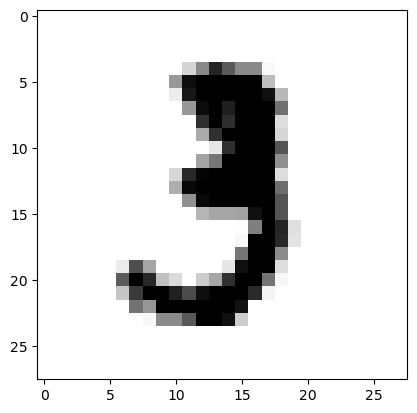

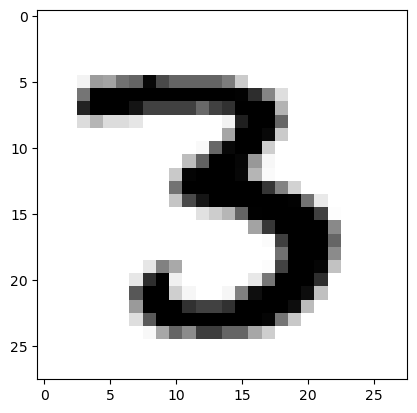

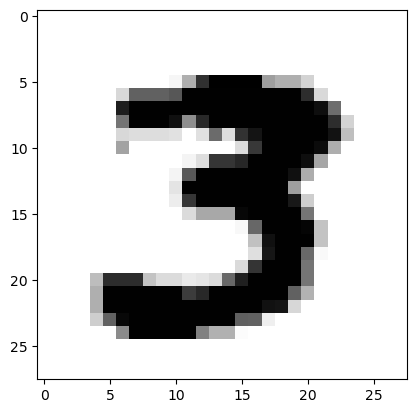

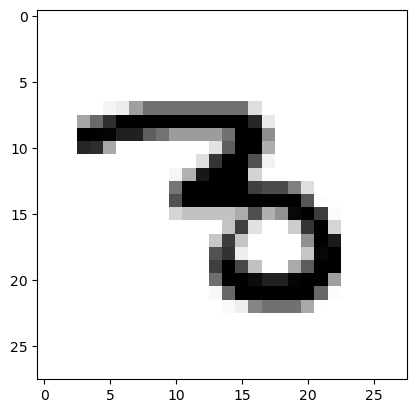

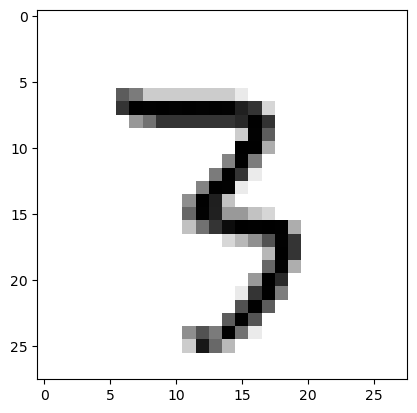

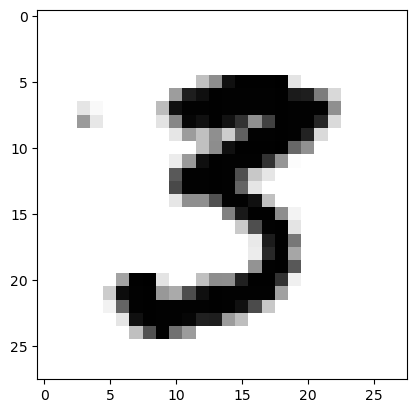

------------------------------

Some samples with label 4 are : 


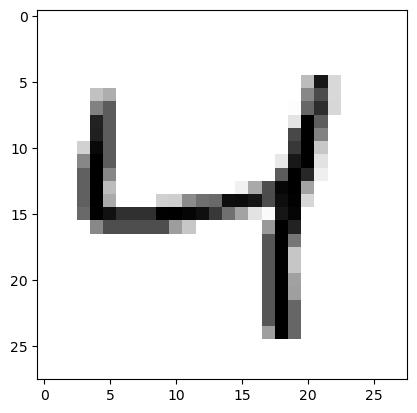

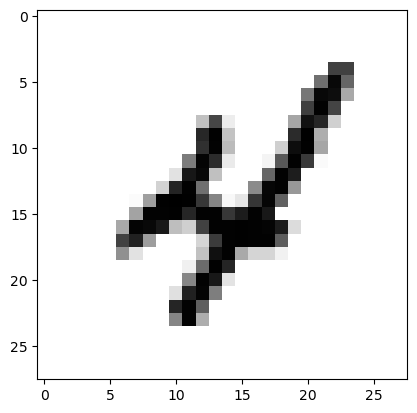

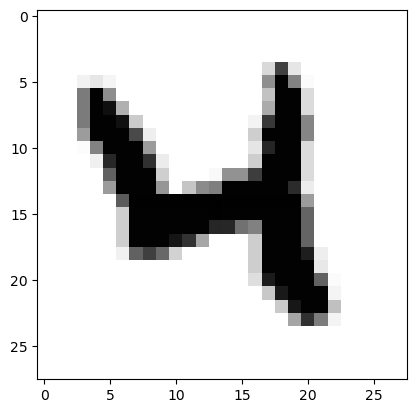

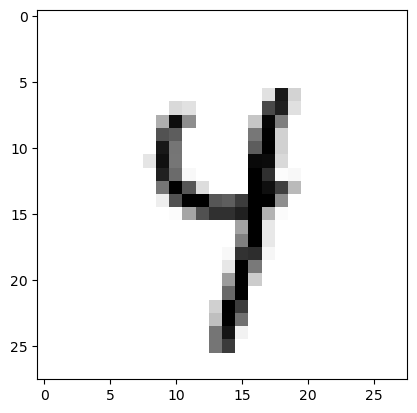

------------------------------

Some samples with label 5 are : 


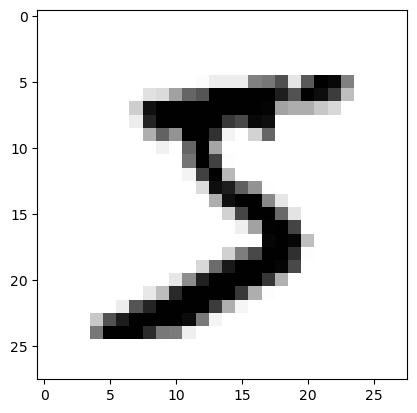

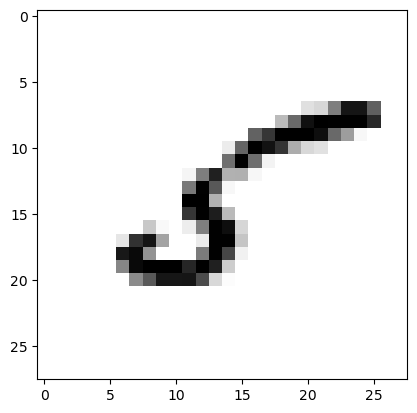

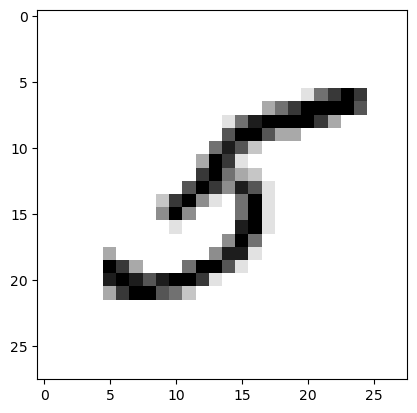

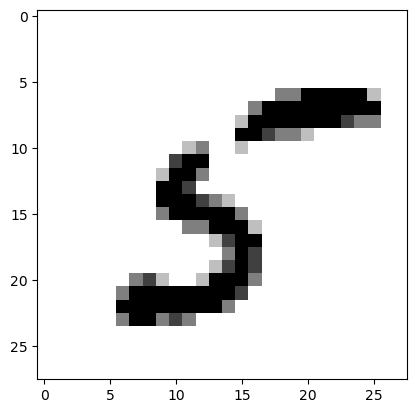

------------------------------

Some samples with label 6 are : 


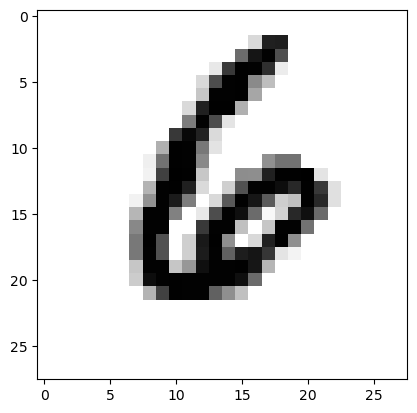

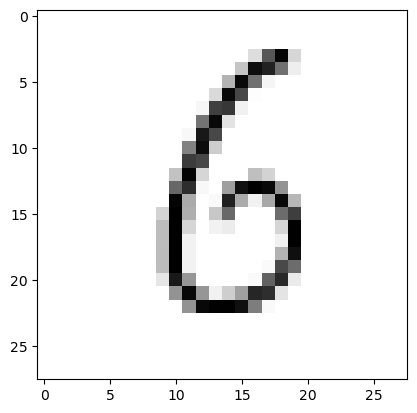

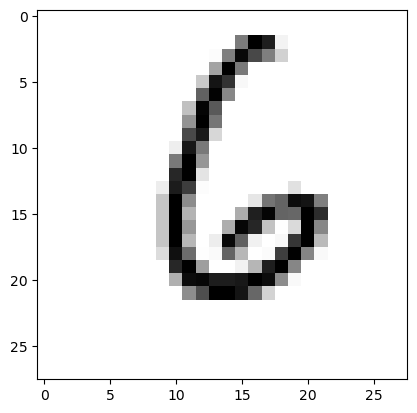

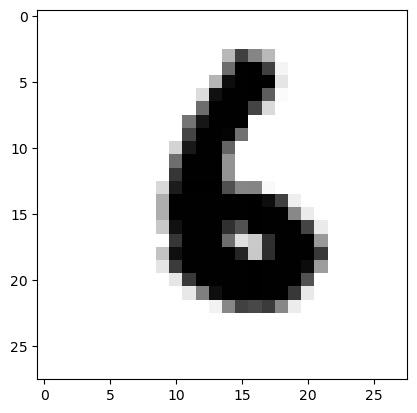

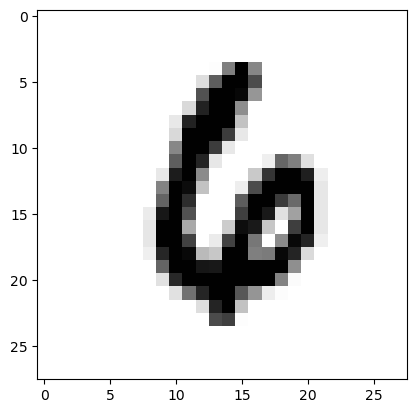

------------------------------

Some samples with label 7 are : 


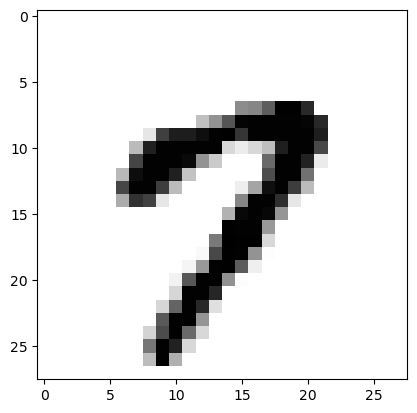

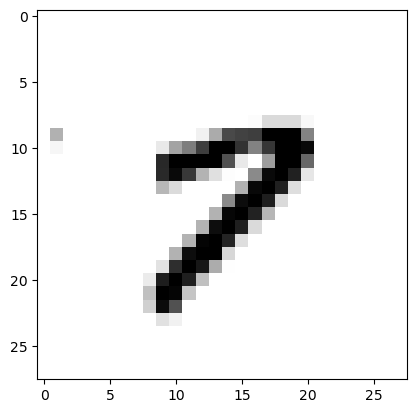

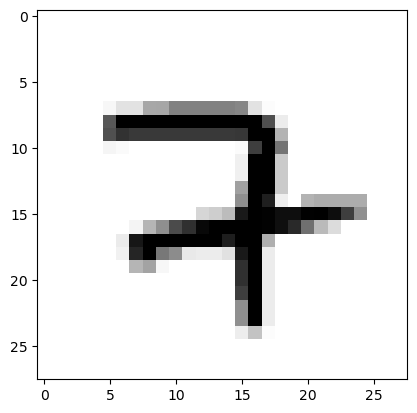

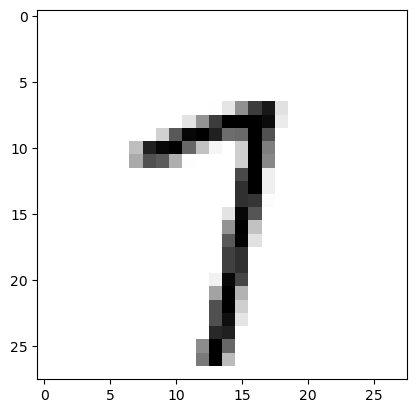

------------------------------

Some samples with label 8 are : 


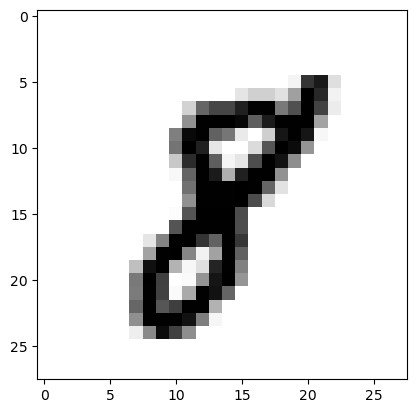

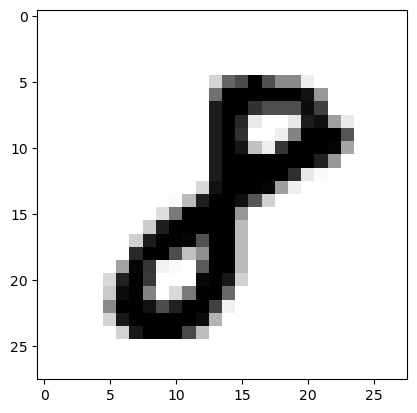

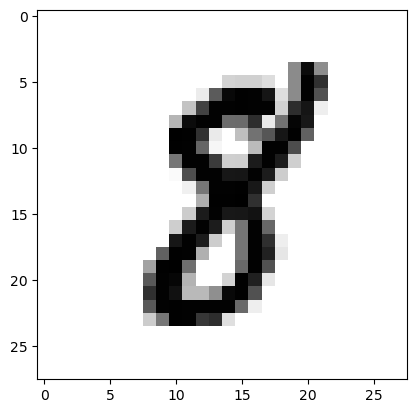

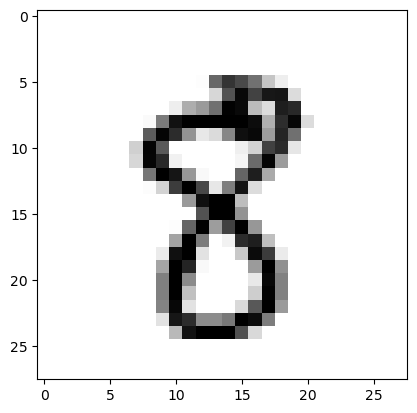

------------------------------

Some samples with label 9 are : 


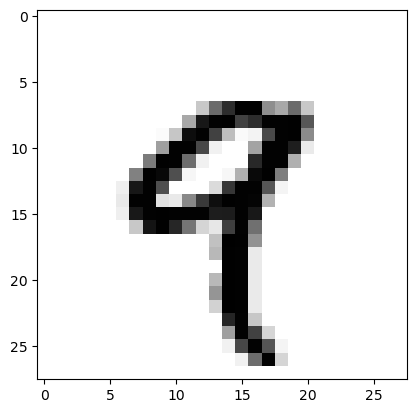

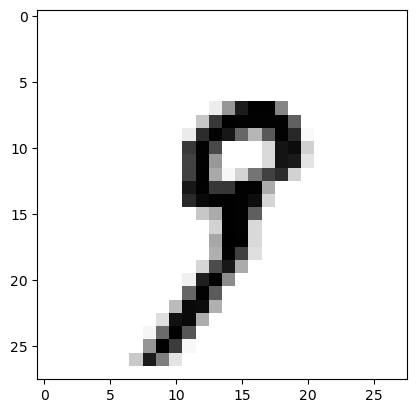

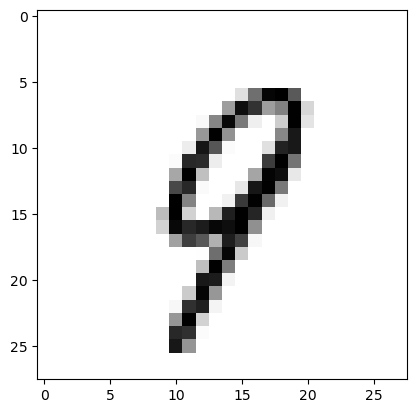

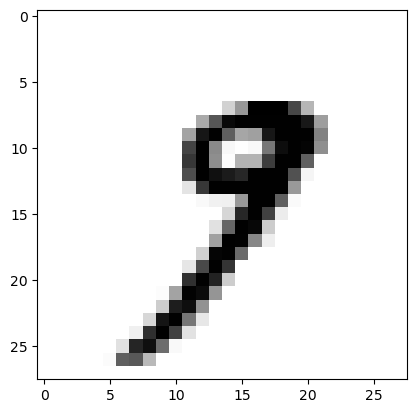

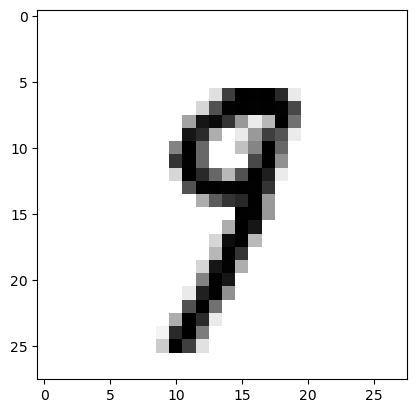

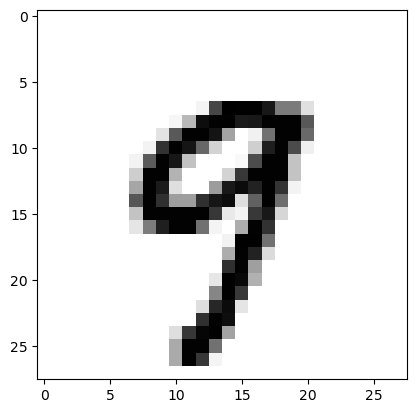

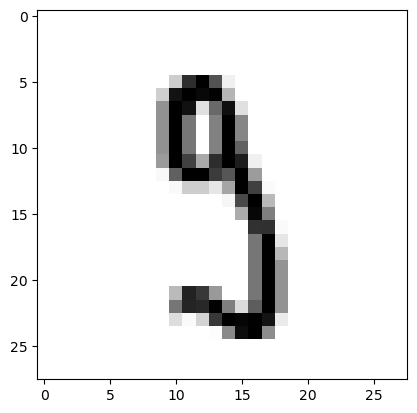

------------------------------



In [50]:
# some examples from each class :
# total 50 examples shown in increasing order...
for i in range(10) :
    print(f"Some samples with label {i} are : ")
    for j in range(50) :
        if (i==dataset[j][1]):
            pixel_values = dataset[j][0][0]
            plt.imshow(pixel_values, cmap='gray_r', vmin=0, vmax=1)
            plt.axis('on')
            plt.show()
    print("------------------------------\n")
    

Label for sample below is : 2


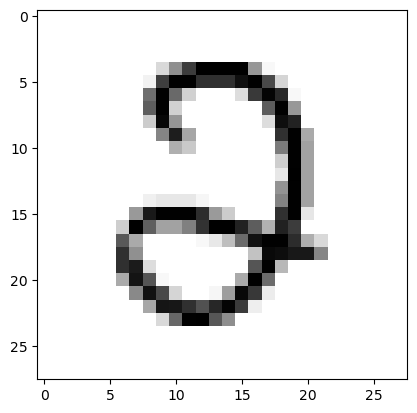

Label for sample below is : 1


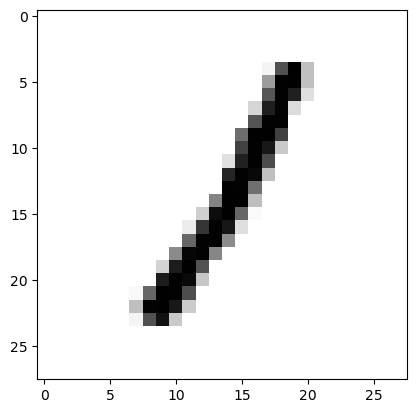

Label for sample below is : 3


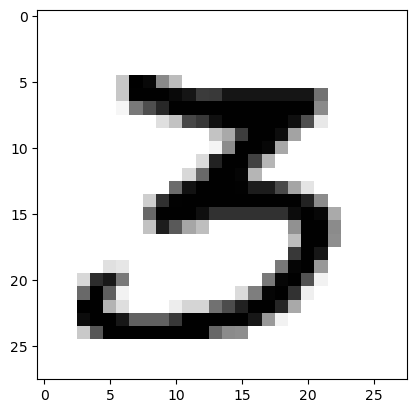

Label for sample below is : 4


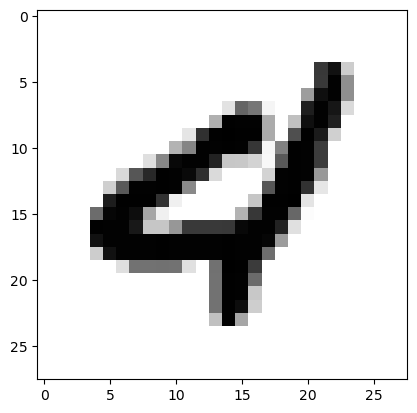

Label for sample below is : 6


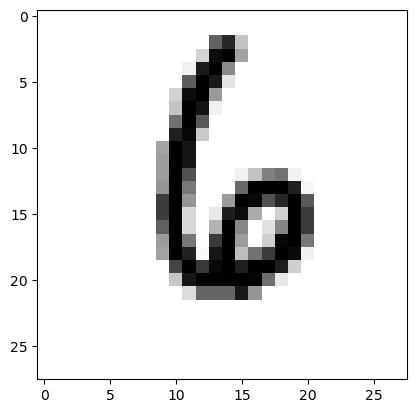

Label for sample below is : 6


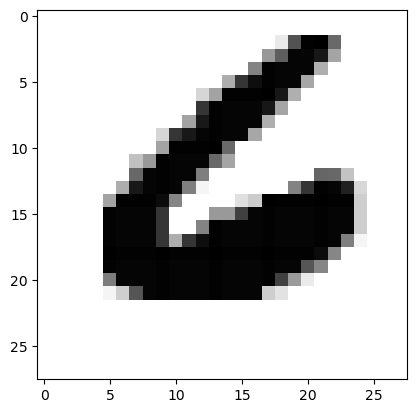

Label for sample below is : 9


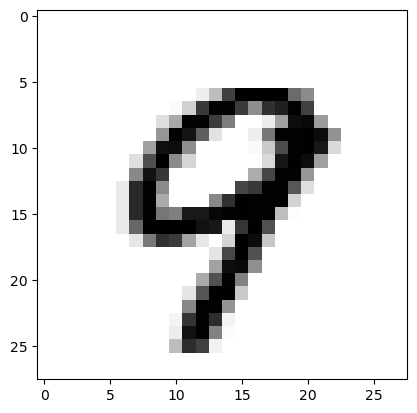

Label for sample below is : 2


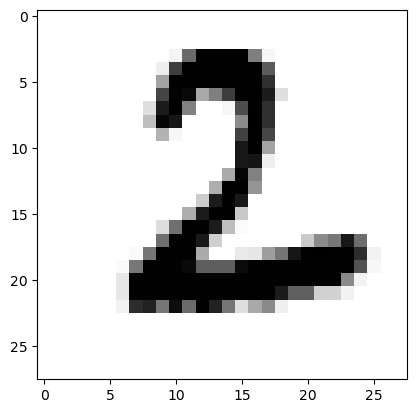

Label for sample below is : 4


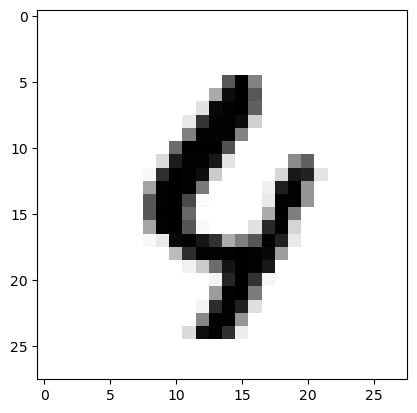

Label for sample below is : 5


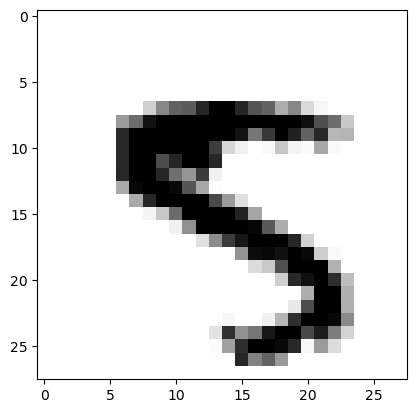

In [51]:
# printing 10 samples randomly along with there labels
for i in range(10) :
    random_number = random.randrange(-1, 60000) 
    pixel_values = dataset[random_number][0][0]
    plt.imshow(pixel_values, cmap='gray_r', vmin=0, vmax=1)
    plt.axis('on')
    print(f"Label for sample below is : {y_train[random_number].item()}")
    plt.show()

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


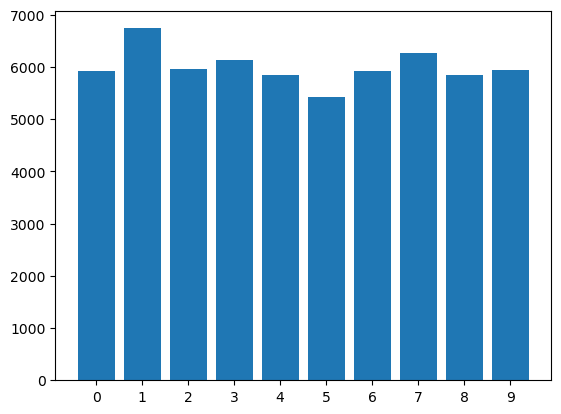

In [52]:
# BAR CHART : showing the distribution of different digits in the dataset
a = np.zeros(10,dtype = np.int32)
for i in range(10) :
    count = torch.eq(y_train, i).sum().item()
    a[i] = count
print(a)

plt.bar([0,1,2,3,4,5,6,7,8,9], a, align='center', alpha=1)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [53]:
# this function will rotate x number of randomly selected images from dataset by any random angle between -theta and theta 
# it returns a tensor with shape (x,784)
def rotate(dataset,x,theta = 30) :
    a = torch.empty(x,784)
    b = torch.empty(x,1)
    rotation_transform = torchvision.transforms.RandomAffine(degrees=(-theta,theta),scale=(1,1))
    for i in range(x) :
        rnum = random.randrange(-1, 60000)
        rotated_image = rotation_transform(dataset[rnum][0])
        a[i] = flatten(rotated_image)          # function is defined in some cell above
        b[i] = dataset[rnum][1]
        # printing some samples of rotated images
        if (i%600==0) :
            print(f"Label corresponding to this image is {int(b[i].item())}")
            print("This is a rotated version")
            show_image(rotated_image)
            print("----------------------------------------------\n")
    return a,b


# this function will scale x number of randomly selected images from dataset by any factor rangeing from scale_min to scale max
# it returns a tensor with shape (x,784)
def scale(dataset,x,scale_min = 0.8,scale_max = 1.2) :
    a = torch.empty(x,784)
    b = torch.empty(x,1)
    scaling_transform = torchvision.transforms.RandomAffine(degrees=0, scale=(scale_min, scale_max))
    for i in range(x) :
        rnum = random.randrange(-1, 60000)
        scaled_image = scaling_transform(dataset[rnum][0])
        a[i] = flatten(scaled_image)          # function is defined in some cell above
        b[i] = dataset[rnum][1]
        # printing some samples of scaled images
        if (i%600==0) :
            print(f"Label corresponding to this image is {int(b[i].item())}")
            print("This is a scaled version")
            show_image(scaled_image)
            print("----------------------------------------------\n")
    return a,b 


# this is a combination of above two functions
# it returns a tensor with shape (x,784)
def rotate_scale(dataset,x,theta = 30,scale_min = 0.8,scale_max = 1.2) :
    a = torch.empty(x,784)
    b = torch.empty(x,1)
    transform_ = torchvision.transforms.RandomAffine(degrees=(-theta,theta), scale=(scale_min, scale_max))
    for i in range(x) :
        rnum = random.randrange(-1, 60000)
        image = transform_(dataset[rnum][0])
        a[i] = flatten(image)          # function is defined in some cell above
        b[i] = dataset[rnum][1]
        # printing some samples of rotated-scaled images
        if (i%600==0) :
            print(f"Label corresponding to this image is {int(b[i].item())}")
            print("This is a rotated-scaled version")
            show_image(image)
            print("----------------------------------------------\n")
    return a,b 

# this functions prints the image corresponding to the given 1 x 28 x 28 tensor
def show_image(tensor):
    plt.imshow(tensor.numpy()[0], cmap='gray_r')
    plt.axis('on')
    plt.show()

Label corresponding to this image is 3
This is a rotated version


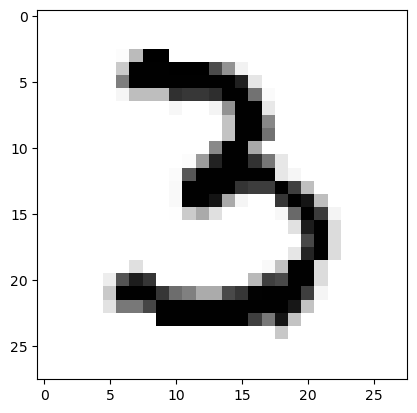

----------------------------------------------

Label corresponding to this image is 6
This is a rotated version


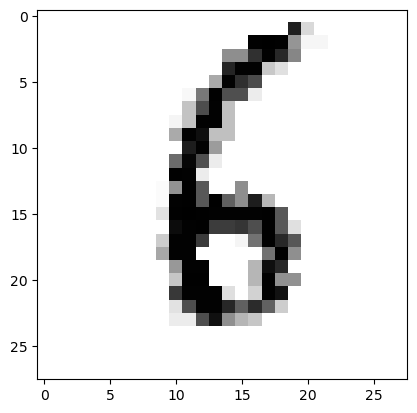

----------------------------------------------

Label corresponding to this image is 2
This is a rotated version


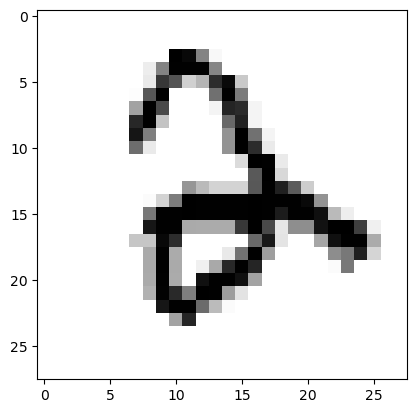

----------------------------------------------

Label corresponding to this image is 8
This is a rotated version


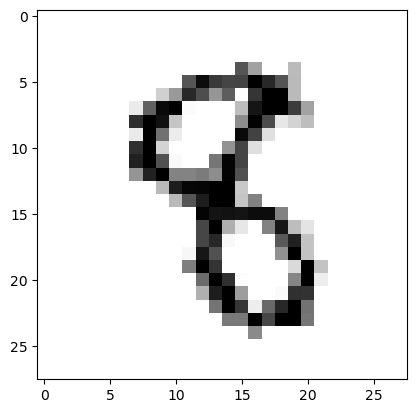

----------------------------------------------

Label corresponding to this image is 7
This is a rotated version


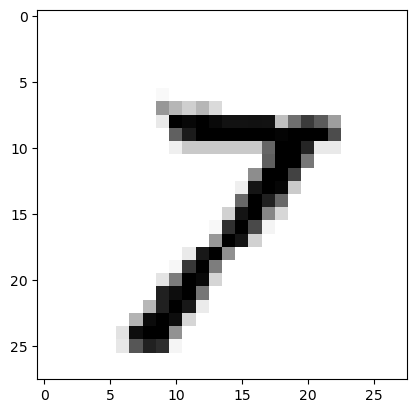

----------------------------------------------

Label corresponding to this image is 0
This is a scaled version


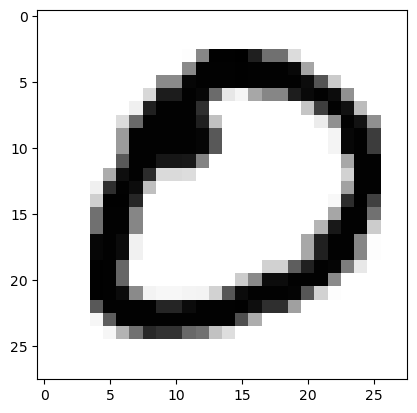

----------------------------------------------

Label corresponding to this image is 1
This is a scaled version


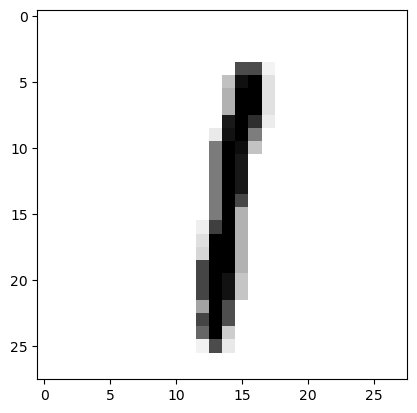

----------------------------------------------

Label corresponding to this image is 7
This is a scaled version


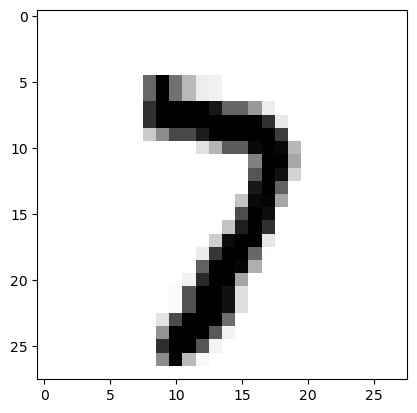

----------------------------------------------

Label corresponding to this image is 6
This is a scaled version


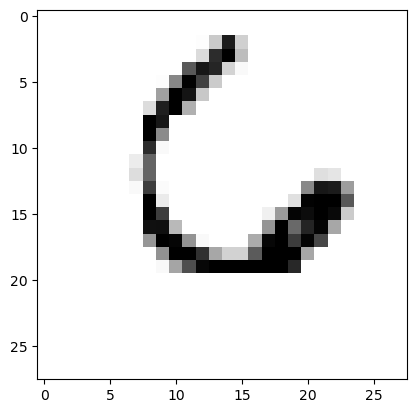

----------------------------------------------

Label corresponding to this image is 1
This is a scaled version


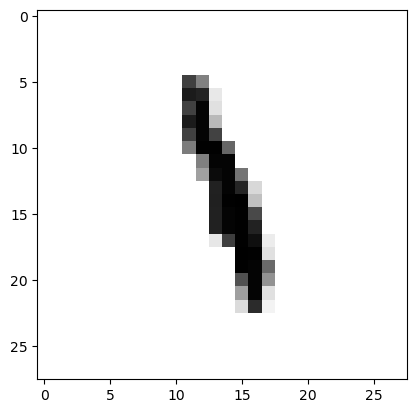

----------------------------------------------

Label corresponding to this image is 9
This is a rotated-scaled version


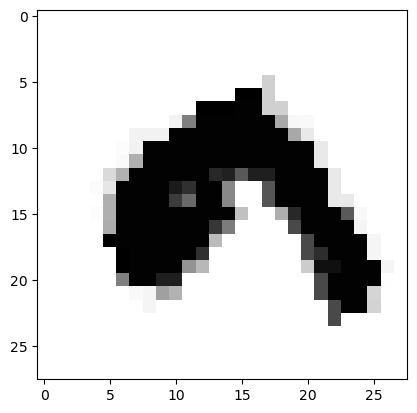

----------------------------------------------

Label corresponding to this image is 7
This is a rotated-scaled version


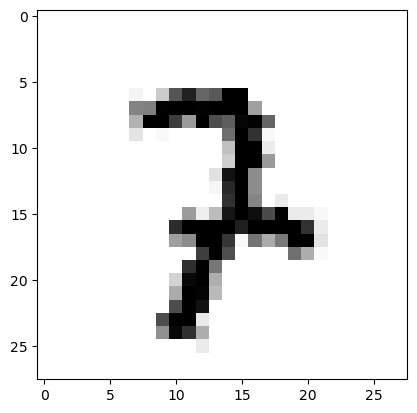

----------------------------------------------

Label corresponding to this image is 6
This is a rotated-scaled version


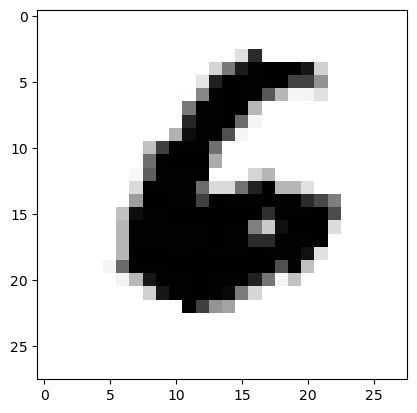

----------------------------------------------

Label corresponding to this image is 5
This is a rotated-scaled version


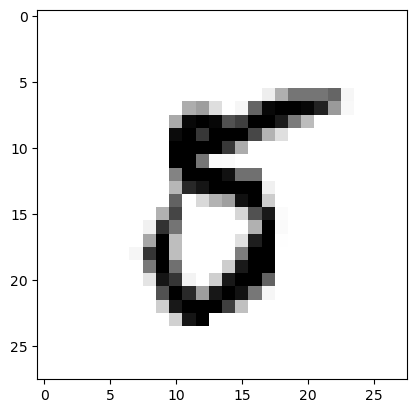

----------------------------------------------

Label corresponding to this image is 5
This is a rotated-scaled version


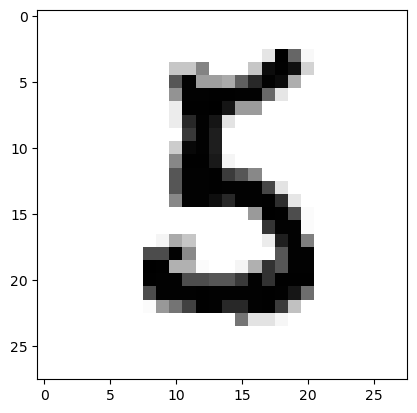

----------------------------------------------

Label corresponding to this image is 2
This is a rotated-scaled version


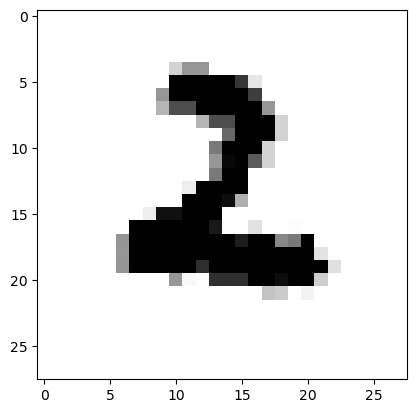

----------------------------------------------

Label corresponding to this image is 4
This is a rotated-scaled version


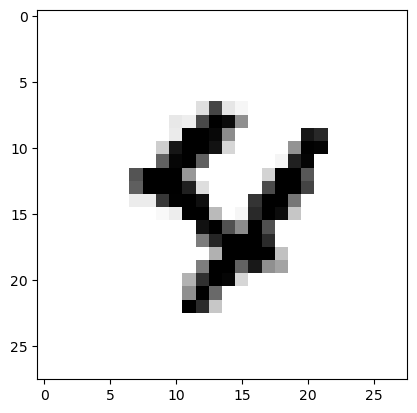

----------------------------------------------

torch.Size([70000, 784])
torch.Size([70000, 1])


In [54]:
# now I'll be rotating 3000, scaling 3000 and rotating-scaling 4000 randomly selected images from the current dataset
# these will be concatenated to the original training set X_train

a,b = rotate(dataset,3000,25)
X_train = torch.cat((X_train,a), axis = 0)
y_train = torch.cat((y_train,b), axis = 0)

c,d = scale(dataset,3000,0.8,1.2)
X_train = torch.cat((X_train,c), axis = 0)
y_train = torch.cat((y_train,d), axis = 0)

e,f = rotate_scale(dataset,4000,25,0.8,1.2)
X_train = torch.cat((X_train,e), axis = 0)
y_train = torch.cat((y_train,f), axis = 0)

print(X_train.shape)
print(y_train.shape)

In [55]:
# There were too many zeros in the dataset... hence the cross entropy loss went to infinity due to operations on these zero valued dataset...
# to avoid this, I subtracted 1 from all the values in the training and testing set... This won't cause any change in the procedure or so... 
# used broadcasting
X_train = 1 - X_train

In [56]:
# Z-Normalization :
# (x - mu)/std , where mu(mean) and std(standard deviation) are of respective feature columns
# storing mu and std for each feature column for Normalizing the test_dataset with the same parameters

'''
mu = torch.empty(784)
std = torch.empty(784)
for i in range(784) :
    mu[i] = X_train[:,i].mean().item();
    std[i] = X_train[:,i].std().item();
    X_train[:,i] = (X_train[:,i]-mu[i])/std[i]
'''

'\nmu = torch.empty(784)\nstd = torch.empty(784)\nfor i in range(784) :\n    mu[i] = X_train[:,i].mean().item();\n    std[i] = X_train[:,i].std().item();\n    X_train[:,i] = (X_train[:,i]-mu[i])/std[i]\n'

In [86]:
'''
# splitting the data into train and test set :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.15, random_state = 41) 
# the dataset made above X_train will be split into 2 parts, 85 % of it will be used to train the model and rest for testing

y_train = y_train.long()   # necessary step, else will give error while using criterion (error calc. step)
'''

In [135]:
# Downlading the test dataset
testset = torchvision.datasets.MNIST(root='./data',train = False, download=True,transform = torchvision.transforms.ToTensor())

In [170]:
# Creating small batches of images , batch size = 20
train_loader = torch.utils.data.DataLoader(dataset,batch_size = 10,shuffle = True) 
test_loader = torch.utils.data.DataLoader(testset,batch_size = 10,shuffle = False) 

In [171]:
# Creating a "CNN" class for defining the behaviour of my neural network
class CNN(torch.nn.Module) :
    def __init__(self):
        super().__init__()
        
        # Convolution Layers :
        self.conv1 = torch.nn.Conv2d(1 , 16 , 5 , 1)    # first convolution layer has a kernel size of 5, strides by 1 unit, input features = 1 and outputs 16 feature maps
        self.conv2 = torch.nn.Conv2d(16 , 32 , 3 , 1)   # first convolution layer has a kernel size of 3, strides by 1 unit, input features = 16 and outputs 32 feature maps
         
        self.bn1 = torch.nn.BatchNorm2d(16)             # BATCH NORMALIZATION
        self.bn2 = torch.nn.BatchNorm2d(32)
        self.bn3 = torch.nn.BatchNorm1d(120)
        self.bn4 = torch.nn.BatchNorm2d(70)
        
        # Fully connected layers : 
        self.fc1 = torch.nn.Linear(5*5*32 , 120)        # no. of inputs to each neuron in this layer will bw 5*5*32 because we will be left with 32 feature maps after 2nd pooling and each will have a size of 5*5
                                                        # setting number of neurons to be 120 in this layer
        
        self.fc2 = torch.nn.Linear(120 , 70)            # setting number of neurons to be 70 in this layer
        self.fc3 = torch.nn.Linear(70 , 10)             # setting number of neurons to be 10 in this layer
        
    def forward(self, x) :
        # 1st pass
        x = self.conv1(x)
        x = torch.nn.functional.relu(self.bn1(x))     # using RelU as activation function
        x = torch.nn.functional.max_pool2d(x,2,2)     # pooling down the feature map with a filter with kernal = 2 and stride = 2
        # 2nd pass
        x = self.conv2(x)
        x = torch.nn.functional.relu(self.bn2(x))
        x = torch.nn.functional.max_pool2d(x,2,2)
    
        # processing for fully connected layers, flattening out the 2D tensor 
        
        x = x.view(-1,5*5*32)
        
        # passing through fully connected layers 
        
        x = self.fc1(x)
        x = torch.nn.functional.relu(self.bn3(x))       # using RelU as activation function
        x = self.fc2(x)
        x = torch.nn.functional.relu(self.bn4(x))
        x = self.fc3(x) 
        x = torch.nn.functional.log_softmax(x , dim = 1)  # using log_softmax as the last activation function to normalize the output of a network to a probability distribution over the output class
        
        return x
        

In [181]:
# Instantiating the Model
torch.manual_seed(10425)
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=10, bias=True)
)

In [203]:
# setting criterion of the model to measure error. We have chosen to measure the Cross Entropy Error.
criterion = torch.nn.CrossEntropyLoss()
# Using Adam Optimizer to optimize the parameters of the CNN
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # setting learning rate to be 0.0001 , can be changed in future
# Here, model.parameters() are the parameter which that Model class consists of...
print(model.parameters)

<bound method Module.parameters of CNN(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=70, bias=True)
  (fc3): Linear(in_features=70, out_features=10, bias=True)
)>


In [208]:
# Training our Model :
num_iterations = 500   # the num of times we will be sending our data across the model/NN
for i in range(num_iterations) :
    netloss = 0 

    # forward propagation :
    
    for b, (X_train,y_train) in enumerate(train_loader) :
        b+=1
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        netloss += loss
        if (b%1000 == 0) :
            print(f"iteration number : {i+1}  , batch number : {b},  loss : {netloss}")  
    print(f"Net loss after iteration number {i+1} : {netloss}")
    
    # back propagation and updation of weights and biases :
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

iteration number : 1  , batch number : 1000,  loss : 165.4513397216797
iteration number : 1  , batch number : 2000,  loss : 330.48876953125
iteration number : 1  , batch number : 3000,  loss : 496.1046142578125
iteration number : 1  , batch number : 4000,  loss : 666.7418212890625
iteration number : 1  , batch number : 5000,  loss : 830.5963745117188
iteration number : 1  , batch number : 6000,  loss : 983.2584838867188
Net loss after iteration number 1 : 983.2584838867188
iteration number : 2  , batch number : 1000,  loss : 161.65060424804688
iteration number : 2  , batch number : 2000,  loss : 322.8680725097656
iteration number : 2  , batch number : 3000,  loss : 493.8110046386719
iteration number : 2  , batch number : 4000,  loss : 655.8630981445312
iteration number : 2  , batch number : 5000,  loss : 813.3735961914062
iteration number : 2  , batch number : 6000,  loss : 981.7311401367188
Net loss after iteration number 2 : 981.7311401367188
iteration number : 3  , batch number : 10

iteration number : 18  , batch number : 1000,  loss : 167.96226501464844
iteration number : 18  , batch number : 2000,  loss : 333.1040954589844
iteration number : 18  , batch number : 3000,  loss : 502.0436096191406
iteration number : 18  , batch number : 4000,  loss : 676.4442749023438
iteration number : 18  , batch number : 5000,  loss : 836.04541015625
iteration number : 18  , batch number : 6000,  loss : 1006.1411743164062
Net loss after iteration number 18 : 1006.1411743164062
iteration number : 19  , batch number : 1000,  loss : 167.5574493408203
iteration number : 19  , batch number : 2000,  loss : 328.3690490722656
iteration number : 19  , batch number : 3000,  loss : 498.3205871582031
iteration number : 19  , batch number : 4000,  loss : 671.140869140625
iteration number : 19  , batch number : 5000,  loss : 831.7380981445312
iteration number : 19  , batch number : 6000,  loss : 1001.1741333007812
Net loss after iteration number 19 : 1001.1741333007812
iteration number : 20  ,

iteration number : 35  , batch number : 1000,  loss : 157.40243530273438
iteration number : 35  , batch number : 2000,  loss : 322.6175537109375
iteration number : 35  , batch number : 3000,  loss : 479.4264831542969
iteration number : 35  , batch number : 4000,  loss : 642.6200561523438
iteration number : 35  , batch number : 5000,  loss : 801.805419921875
iteration number : 35  , batch number : 6000,  loss : 953.70556640625
Net loss after iteration number 35 : 953.70556640625
iteration number : 36  , batch number : 1000,  loss : 147.3983612060547
iteration number : 36  , batch number : 2000,  loss : 315.9055480957031
iteration number : 36  , batch number : 3000,  loss : 469.0820007324219
iteration number : 36  , batch number : 4000,  loss : 634.5532836914062
iteration number : 36  , batch number : 5000,  loss : 797.7078857421875
iteration number : 36  , batch number : 6000,  loss : 952.3270263671875
Net loss after iteration number 36 : 952.3270263671875
iteration number : 37  , batch

iteration number : 52  , batch number : 1000,  loss : 164.17269897460938
iteration number : 52  , batch number : 2000,  loss : 326.5499572753906
iteration number : 52  , batch number : 3000,  loss : 482.1487731933594
iteration number : 52  , batch number : 4000,  loss : 644.9039306640625
iteration number : 52  , batch number : 5000,  loss : 798.0656127929688
iteration number : 52  , batch number : 6000,  loss : 953.5408935546875
Net loss after iteration number 52 : 953.5408935546875
iteration number : 53  , batch number : 1000,  loss : 162.52938842773438
iteration number : 53  , batch number : 2000,  loss : 329.9190979003906
iteration number : 53  , batch number : 3000,  loss : 487.74298095703125
iteration number : 53  , batch number : 4000,  loss : 658.3389892578125
iteration number : 53  , batch number : 5000,  loss : 816.0263061523438
iteration number : 53  , batch number : 6000,  loss : 975.4946899414062
Net loss after iteration number 53 : 975.4946899414062
iteration number : 54  

iteration number : 69  , batch number : 1000,  loss : 159.40834045410156
iteration number : 69  , batch number : 2000,  loss : 336.9888610839844
iteration number : 69  , batch number : 3000,  loss : 496.9769592285156
iteration number : 69  , batch number : 4000,  loss : 659.2809448242188
iteration number : 69  , batch number : 5000,  loss : 818.6688842773438
iteration number : 69  , batch number : 6000,  loss : 971.8849487304688
Net loss after iteration number 69 : 971.8849487304688
iteration number : 70  , batch number : 1000,  loss : 157.95217895507812
iteration number : 70  , batch number : 2000,  loss : 311.9778747558594
iteration number : 70  , batch number : 3000,  loss : 472.9823913574219
iteration number : 70  , batch number : 4000,  loss : 633.73779296875
iteration number : 70  , batch number : 5000,  loss : 804.5914916992188
iteration number : 70  , batch number : 6000,  loss : 968.2305908203125
Net loss after iteration number 70 : 968.2305908203125
iteration number : 71  , b

iteration number : 86  , batch number : 1000,  loss : 175.7516632080078
iteration number : 86  , batch number : 2000,  loss : 355.33526611328125
iteration number : 86  , batch number : 3000,  loss : 525.5580444335938
iteration number : 86  , batch number : 4000,  loss : 684.4270629882812
iteration number : 86  , batch number : 5000,  loss : 848.4832763671875
iteration number : 86  , batch number : 6000,  loss : 1007.4903564453125
Net loss after iteration number 86 : 1007.4903564453125
iteration number : 87  , batch number : 1000,  loss : 166.72509765625
iteration number : 87  , batch number : 2000,  loss : 335.5608825683594
iteration number : 87  , batch number : 3000,  loss : 502.7069091796875
iteration number : 87  , batch number : 4000,  loss : 677.7954711914062
iteration number : 87  , batch number : 5000,  loss : 853.1043090820312
iteration number : 87  , batch number : 6000,  loss : 1018.3912353515625
Net loss after iteration number 87 : 1018.3912353515625
iteration number : 88  

iteration number : 103  , batch number : 1000,  loss : 132.40052795410156
iteration number : 103  , batch number : 2000,  loss : 273.5121765136719
iteration number : 103  , batch number : 3000,  loss : 413.9325866699219
iteration number : 103  , batch number : 4000,  loss : 556.258544921875
iteration number : 103  , batch number : 5000,  loss : 687.9113159179688
iteration number : 103  , batch number : 6000,  loss : 829.7779541015625
Net loss after iteration number 103 : 829.7779541015625
iteration number : 104  , batch number : 1000,  loss : 137.828369140625
iteration number : 104  , batch number : 2000,  loss : 271.6408386230469
iteration number : 104  , batch number : 3000,  loss : 410.1643981933594
iteration number : 104  , batch number : 4000,  loss : 540.0546875
iteration number : 104  , batch number : 5000,  loss : 680.7978515625
iteration number : 104  , batch number : 6000,  loss : 827.7894287109375
Net loss after iteration number 104 : 827.7894287109375
iteration number : 105

iteration number : 119  , batch number : 6000,  loss : 848.4628295898438
Net loss after iteration number 119 : 848.4628295898438
iteration number : 120  , batch number : 1000,  loss : 148.08148193359375
iteration number : 120  , batch number : 2000,  loss : 290.67242431640625
iteration number : 120  , batch number : 3000,  loss : 441.9788818359375
iteration number : 120  , batch number : 4000,  loss : 581.9861450195312
iteration number : 120  , batch number : 5000,  loss : 713.9990234375
iteration number : 120  , batch number : 6000,  loss : 847.4351196289062
Net loss after iteration number 120 : 847.4351196289062
iteration number : 121  , batch number : 1000,  loss : 129.10365295410156
iteration number : 121  , batch number : 2000,  loss : 268.5890197753906
iteration number : 121  , batch number : 3000,  loss : 408.86138916015625
iteration number : 121  , batch number : 4000,  loss : 557.7042236328125
iteration number : 121  , batch number : 5000,  loss : 701.027099609375
iteration nu

iteration number : 136  , batch number : 4000,  loss : 617.5860595703125
iteration number : 136  , batch number : 5000,  loss : 782.975830078125
iteration number : 136  , batch number : 6000,  loss : 945.2036743164062
Net loss after iteration number 136 : 945.2036743164062
iteration number : 137  , batch number : 1000,  loss : 159.101318359375
iteration number : 137  , batch number : 2000,  loss : 310.09991455078125
iteration number : 137  , batch number : 3000,  loss : 482.80908203125
iteration number : 137  , batch number : 4000,  loss : 637.1652221679688
iteration number : 137  , batch number : 5000,  loss : 791.1052856445312
iteration number : 137  , batch number : 6000,  loss : 958.9794311523438
Net loss after iteration number 137 : 958.9794311523438
iteration number : 138  , batch number : 1000,  loss : 157.82528686523438
iteration number : 138  , batch number : 2000,  loss : 320.3069763183594
iteration number : 138  , batch number : 3000,  loss : 478.7918701171875
iteration numb

iteration number : 153  , batch number : 2000,  loss : 286.065673828125
iteration number : 153  , batch number : 3000,  loss : 434.6622009277344
iteration number : 153  , batch number : 4000,  loss : 573.573974609375
iteration number : 153  , batch number : 5000,  loss : 722.9398193359375
iteration number : 153  , batch number : 6000,  loss : 873.9322509765625
Net loss after iteration number 153 : 873.9322509765625
iteration number : 154  , batch number : 1000,  loss : 136.58230590820312
iteration number : 154  , batch number : 2000,  loss : 268.81805419921875
iteration number : 154  , batch number : 3000,  loss : 414.3206481933594
iteration number : 154  , batch number : 4000,  loss : 559.3364868164062
iteration number : 154  , batch number : 5000,  loss : 715.667724609375
iteration number : 154  , batch number : 6000,  loss : 859.9588623046875
Net loss after iteration number 154 : 859.9588623046875
iteration number : 155  , batch number : 1000,  loss : 151.18417358398438
iteration nu

iteration number : 170  , batch number : 1000,  loss : 142.2769317626953
iteration number : 170  , batch number : 2000,  loss : 286.33026123046875
iteration number : 170  , batch number : 3000,  loss : 426.3582458496094
iteration number : 170  , batch number : 4000,  loss : 557.9952392578125
iteration number : 170  , batch number : 5000,  loss : 689.8662719726562
iteration number : 170  , batch number : 6000,  loss : 831.3309936523438
Net loss after iteration number 170 : 831.3309936523438
iteration number : 171  , batch number : 1000,  loss : 134.3232879638672
iteration number : 171  , batch number : 2000,  loss : 270.5328369140625
iteration number : 171  , batch number : 3000,  loss : 408.0284423828125
iteration number : 171  , batch number : 4000,  loss : 549.5941772460938
iteration number : 171  , batch number : 5000,  loss : 696.0010986328125
iteration number : 171  , batch number : 6000,  loss : 827.6798095703125
Net loss after iteration number 171 : 827.6798095703125
iteration n

iteration number : 186  , batch number : 6000,  loss : 764.6891479492188
Net loss after iteration number 186 : 764.6891479492188
iteration number : 187  , batch number : 1000,  loss : 129.6773223876953
iteration number : 187  , batch number : 2000,  loss : 245.94654846191406
iteration number : 187  , batch number : 3000,  loss : 379.66058349609375
iteration number : 187  , batch number : 4000,  loss : 506.81298828125
iteration number : 187  , batch number : 5000,  loss : 632.170654296875
iteration number : 187  , batch number : 6000,  loss : 761.3453979492188
Net loss after iteration number 187 : 761.3453979492188
iteration number : 188  , batch number : 1000,  loss : 129.54884338378906
iteration number : 188  , batch number : 2000,  loss : 248.81069946289062
iteration number : 188  , batch number : 3000,  loss : 371.71405029296875
iteration number : 188  , batch number : 4000,  loss : 505.1676940917969
iteration number : 188  , batch number : 5000,  loss : 633.3119506835938
iteration 

iteration number : 203  , batch number : 4000,  loss : 520.4461669921875
iteration number : 203  , batch number : 5000,  loss : 657.4616088867188
iteration number : 203  , batch number : 6000,  loss : 786.39306640625
Net loss after iteration number 203 : 786.39306640625
iteration number : 204  , batch number : 1000,  loss : 130.9691925048828
iteration number : 204  , batch number : 2000,  loss : 263.7811584472656
iteration number : 204  , batch number : 3000,  loss : 392.42462158203125
iteration number : 204  , batch number : 4000,  loss : 523.5174560546875
iteration number : 204  , batch number : 5000,  loss : 660.0139770507812
iteration number : 204  , batch number : 6000,  loss : 783.5965576171875
Net loss after iteration number 204 : 783.5965576171875
iteration number : 205  , batch number : 1000,  loss : 136.0799102783203
iteration number : 205  , batch number : 2000,  loss : 270.7412109375
iteration number : 205  , batch number : 3000,  loss : 397.0819091796875
iteration number :

iteration number : 220  , batch number : 2000,  loss : 249.34295654296875
iteration number : 220  , batch number : 3000,  loss : 389.9720764160156
iteration number : 220  , batch number : 4000,  loss : 511.1482238769531
iteration number : 220  , batch number : 5000,  loss : 634.5154418945312
iteration number : 220  , batch number : 6000,  loss : 764.3583374023438
Net loss after iteration number 220 : 764.3583374023438
iteration number : 221  , batch number : 1000,  loss : 123.89625549316406
iteration number : 221  , batch number : 2000,  loss : 253.2562255859375
iteration number : 221  , batch number : 3000,  loss : 375.7704772949219
iteration number : 221  , batch number : 4000,  loss : 502.11285400390625
iteration number : 221  , batch number : 5000,  loss : 628.197021484375
iteration number : 221  , batch number : 6000,  loss : 756.3530883789062
Net loss after iteration number 221 : 756.3530883789062
iteration number : 222  , batch number : 1000,  loss : 122.04727172851562
iteration

iteration number : 237  , batch number : 1000,  loss : 162.21580505371094
iteration number : 237  , batch number : 2000,  loss : 320.17706298828125
iteration number : 237  , batch number : 3000,  loss : 471.73468017578125
iteration number : 237  , batch number : 4000,  loss : 619.2205200195312
iteration number : 237  , batch number : 5000,  loss : 766.6824951171875
iteration number : 237  , batch number : 6000,  loss : 924.9161987304688
Net loss after iteration number 237 : 924.9161987304688
iteration number : 238  , batch number : 1000,  loss : 153.51132202148438
iteration number : 238  , batch number : 2000,  loss : 315.0712890625
iteration number : 238  , batch number : 3000,  loss : 461.5950927734375
iteration number : 238  , batch number : 4000,  loss : 614.099365234375
iteration number : 238  , batch number : 5000,  loss : 771.0661010742188
iteration number : 238  , batch number : 6000,  loss : 943.3624267578125
Net loss after iteration number 238 : 943.3624267578125
iteration nu

iteration number : 253  , batch number : 6000,  loss : 931.041748046875
Net loss after iteration number 253 : 931.041748046875
iteration number : 254  , batch number : 1000,  loss : 151.45120239257812
iteration number : 254  , batch number : 2000,  loss : 313.44561767578125
iteration number : 254  , batch number : 3000,  loss : 471.8016357421875
iteration number : 254  , batch number : 4000,  loss : 627.2807006835938
iteration number : 254  , batch number : 5000,  loss : 783.8626708984375
iteration number : 254  , batch number : 6000,  loss : 932.4435424804688
Net loss after iteration number 254 : 932.4435424804688
iteration number : 255  , batch number : 1000,  loss : 149.80235290527344
iteration number : 255  , batch number : 2000,  loss : 312.79583740234375
iteration number : 255  , batch number : 3000,  loss : 459.3022155761719
iteration number : 255  , batch number : 4000,  loss : 616.9669799804688
iteration number : 255  , batch number : 5000,  loss : 774.5390014648438
iteration 

iteration number : 270  , batch number : 4000,  loss : 493.7613220214844
iteration number : 270  , batch number : 5000,  loss : 615.2246704101562
iteration number : 270  , batch number : 6000,  loss : 731.9085693359375
Net loss after iteration number 270 : 731.9085693359375
iteration number : 271  , batch number : 1000,  loss : 121.85411071777344
iteration number : 271  , batch number : 2000,  loss : 234.93167114257812
iteration number : 271  , batch number : 3000,  loss : 359.7443542480469
iteration number : 271  , batch number : 4000,  loss : 490.636962890625
iteration number : 271  , batch number : 5000,  loss : 611.5104370117188
iteration number : 271  , batch number : 6000,  loss : 730.7023315429688
Net loss after iteration number 271 : 730.7023315429688
iteration number : 272  , batch number : 1000,  loss : 124.37874603271484
iteration number : 272  , batch number : 2000,  loss : 245.44644165039062
iteration number : 272  , batch number : 3000,  loss : 360.9834899902344
iteration

iteration number : 287  , batch number : 2000,  loss : 269.196533203125
iteration number : 287  , batch number : 3000,  loss : 397.91986083984375
iteration number : 287  , batch number : 4000,  loss : 529.139892578125
iteration number : 287  , batch number : 5000,  loss : 659.3567504882812
iteration number : 287  , batch number : 6000,  loss : 785.5382080078125
Net loss after iteration number 287 : 785.5382080078125
iteration number : 288  , batch number : 1000,  loss : 128.86907958984375
iteration number : 288  , batch number : 2000,  loss : 268.49456787109375
iteration number : 288  , batch number : 3000,  loss : 393.6078796386719
iteration number : 288  , batch number : 4000,  loss : 526.6892700195312
iteration number : 288  , batch number : 5000,  loss : 662.2400512695312
iteration number : 288  , batch number : 6000,  loss : 797.4269409179688
Net loss after iteration number 288 : 797.4269409179688
iteration number : 289  , batch number : 1000,  loss : 132.59214782714844
iteration 

iteration number : 304  , batch number : 1000,  loss : 129.41354370117188
iteration number : 304  , batch number : 2000,  loss : 250.6001434326172
iteration number : 304  , batch number : 3000,  loss : 384.5630187988281
iteration number : 304  , batch number : 4000,  loss : 503.8313293457031
iteration number : 304  , batch number : 5000,  loss : 631.5581665039062
iteration number : 304  , batch number : 6000,  loss : 758.10595703125
Net loss after iteration number 304 : 758.10595703125
iteration number : 305  , batch number : 1000,  loss : 140.31488037109375
iteration number : 305  , batch number : 2000,  loss : 275.03143310546875
iteration number : 305  , batch number : 3000,  loss : 404.31585693359375
iteration number : 305  , batch number : 4000,  loss : 521.4173583984375
iteration number : 305  , batch number : 5000,  loss : 642.266845703125
iteration number : 305  , batch number : 6000,  loss : 761.0990600585938
Net loss after iteration number 305 : 761.0990600585938
iteration num

iteration number : 320  , batch number : 5000,  loss : 750.9381103515625
iteration number : 320  , batch number : 6000,  loss : 892.5109252929688
Net loss after iteration number 320 : 892.5109252929688
iteration number : 321  , batch number : 1000,  loss : 156.81813049316406
iteration number : 321  , batch number : 2000,  loss : 305.96795654296875
iteration number : 321  , batch number : 3000,  loss : 445.8583068847656
iteration number : 321  , batch number : 4000,  loss : 600.6771850585938
iteration number : 321  , batch number : 5000,  loss : 743.7794189453125
iteration number : 321  , batch number : 6000,  loss : 875.8504028320312
Net loss after iteration number 321 : 875.8504028320312
iteration number : 322  , batch number : 1000,  loss : 143.49832153320312
iteration number : 322  , batch number : 2000,  loss : 277.3135070800781
iteration number : 322  , batch number : 3000,  loss : 420.5545959472656
iteration number : 322  , batch number : 4000,  loss : 561.8519287109375
iteration

iteration number : 337  , batch number : 3000,  loss : 398.3097839355469
iteration number : 337  , batch number : 4000,  loss : 532.0938110351562
iteration number : 337  , batch number : 5000,  loss : 651.4102172851562
iteration number : 337  , batch number : 6000,  loss : 785.8350219726562
Net loss after iteration number 337 : 785.8350219726562
iteration number : 338  , batch number : 1000,  loss : 128.65234375
iteration number : 338  , batch number : 2000,  loss : 256.1850891113281
iteration number : 338  , batch number : 3000,  loss : 395.4488830566406
iteration number : 338  , batch number : 4000,  loss : 532.0105590820312
iteration number : 338  , batch number : 5000,  loss : 664.2890625
iteration number : 338  , batch number : 6000,  loss : 792.673583984375
Net loss after iteration number 338 : 792.673583984375
iteration number : 339  , batch number : 1000,  loss : 137.82943725585938
iteration number : 339  , batch number : 2000,  loss : 259.4756774902344
iteration number : 339  

iteration number : 354  , batch number : 1000,  loss : 122.32559204101562
iteration number : 354  , batch number : 2000,  loss : 247.47409057617188
iteration number : 354  , batch number : 3000,  loss : 370.7738342285156
iteration number : 354  , batch number : 4000,  loss : 502.2838439941406
iteration number : 354  , batch number : 5000,  loss : 629.3328247070312
iteration number : 354  , batch number : 6000,  loss : 758.8284301757812
Net loss after iteration number 354 : 758.8284301757812
iteration number : 355  , batch number : 1000,  loss : 127.40916442871094
iteration number : 355  , batch number : 2000,  loss : 258.9535217285156
iteration number : 355  , batch number : 3000,  loss : 381.8737487792969
iteration number : 355  , batch number : 4000,  loss : 507.6244812011719
iteration number : 355  , batch number : 5000,  loss : 629.0599975585938
iteration number : 355  , batch number : 6000,  loss : 754.96630859375
Net loss after iteration number 355 : 754.96630859375
iteration num

iteration number : 370  , batch number : 6000,  loss : 765.3055419921875
Net loss after iteration number 370 : 765.3055419921875
iteration number : 371  , batch number : 1000,  loss : 129.02952575683594
iteration number : 371  , batch number : 2000,  loss : 252.5568389892578
iteration number : 371  , batch number : 3000,  loss : 382.4543762207031
iteration number : 371  , batch number : 4000,  loss : 513.5364990234375
iteration number : 371  , batch number : 5000,  loss : 635.3035888671875
iteration number : 371  , batch number : 6000,  loss : 769.2973022460938
Net loss after iteration number 371 : 769.2973022460938
iteration number : 372  , batch number : 1000,  loss : 125.25823211669922
iteration number : 372  , batch number : 2000,  loss : 252.25608825683594
iteration number : 372  , batch number : 3000,  loss : 379.7827453613281
iteration number : 372  , batch number : 4000,  loss : 505.924560546875
iteration number : 372  , batch number : 5000,  loss : 637.380859375
iteration numb

iteration number : 387  , batch number : 4000,  loss : 510.1688537597656
iteration number : 387  , batch number : 5000,  loss : 628.582763671875
iteration number : 387  , batch number : 6000,  loss : 745.6909790039062
Net loss after iteration number 387 : 745.6909790039062
iteration number : 388  , batch number : 1000,  loss : 129.35704040527344
iteration number : 388  , batch number : 2000,  loss : 253.15830993652344
iteration number : 388  , batch number : 3000,  loss : 378.6224670410156
iteration number : 388  , batch number : 4000,  loss : 503.8060302734375
iteration number : 388  , batch number : 5000,  loss : 622.7667236328125
iteration number : 388  , batch number : 6000,  loss : 749.9010620117188
Net loss after iteration number 388 : 749.9010620117188
iteration number : 389  , batch number : 1000,  loss : 131.7866668701172
iteration number : 389  , batch number : 2000,  loss : 266.02301025390625
iteration number : 389  , batch number : 3000,  loss : 389.647705078125
iteration n

iteration number : 404  , batch number : 2000,  loss : 261.0669860839844
iteration number : 404  , batch number : 3000,  loss : 395.5780334472656
iteration number : 404  , batch number : 4000,  loss : 536.9176635742188
iteration number : 404  , batch number : 5000,  loss : 669.9890747070312
iteration number : 404  , batch number : 6000,  loss : 806.4866943359375
Net loss after iteration number 404 : 806.4866943359375
iteration number : 405  , batch number : 1000,  loss : 131.86138916015625
iteration number : 405  , batch number : 2000,  loss : 271.94195556640625
iteration number : 405  , batch number : 3000,  loss : 405.5142822265625
iteration number : 405  , batch number : 4000,  loss : 535.9160766601562
iteration number : 405  , batch number : 5000,  loss : 678.4793090820312
iteration number : 405  , batch number : 6000,  loss : 811.7314453125
Net loss after iteration number 405 : 811.7314453125
iteration number : 406  , batch number : 1000,  loss : 136.54104614257812
iteration numbe

iteration number : 421  , batch number : 1000,  loss : 118.37281799316406
iteration number : 421  , batch number : 2000,  loss : 234.64114379882812
iteration number : 421  , batch number : 3000,  loss : 354.4747009277344
iteration number : 421  , batch number : 4000,  loss : 475.8796691894531
iteration number : 421  , batch number : 5000,  loss : 594.995361328125
iteration number : 421  , batch number : 6000,  loss : 731.2724609375
Net loss after iteration number 421 : 731.2724609375
iteration number : 422  , batch number : 1000,  loss : 119.09400939941406
iteration number : 422  , batch number : 2000,  loss : 243.8027801513672
iteration number : 422  , batch number : 3000,  loss : 369.5306091308594
iteration number : 422  , batch number : 4000,  loss : 492.9756164550781
iteration number : 422  , batch number : 5000,  loss : 611.0654296875
iteration number : 422  , batch number : 6000,  loss : 727.3993530273438
Net loss after iteration number 422 : 727.3993530273438
iteration number : 

iteration number : 437  , batch number : 6000,  loss : 922.6029663085938
Net loss after iteration number 437 : 922.6029663085938
iteration number : 438  , batch number : 1000,  loss : 149.5238494873047
iteration number : 438  , batch number : 2000,  loss : 297.76153564453125
iteration number : 438  , batch number : 3000,  loss : 459.3136901855469
iteration number : 438  , batch number : 4000,  loss : 618.4376831054688
iteration number : 438  , batch number : 5000,  loss : 779.7598266601562
iteration number : 438  , batch number : 6000,  loss : 928.890380859375
Net loss after iteration number 438 : 928.890380859375
iteration number : 439  , batch number : 1000,  loss : 163.28671264648438
iteration number : 439  , batch number : 2000,  loss : 315.10528564453125
iteration number : 439  , batch number : 3000,  loss : 472.1959228515625
iteration number : 439  , batch number : 4000,  loss : 623.6031494140625
iteration number : 439  , batch number : 5000,  loss : 772.994873046875
iteration nu

iteration number : 454  , batch number : 4000,  loss : 441.5389404296875
iteration number : 454  , batch number : 5000,  loss : 561.0747680664062
iteration number : 454  , batch number : 6000,  loss : 673.2257690429688
Net loss after iteration number 454 : 673.2257690429688
iteration number : 455  , batch number : 1000,  loss : 111.39763641357422
iteration number : 455  , batch number : 2000,  loss : 219.4535369873047
iteration number : 455  , batch number : 3000,  loss : 348.9208068847656
iteration number : 455  , batch number : 4000,  loss : 461.0854187011719
iteration number : 455  , batch number : 5000,  loss : 577.9286499023438
iteration number : 455  , batch number : 6000,  loss : 685.8861694335938
Net loss after iteration number 455 : 685.8861694335938
iteration number : 456  , batch number : 1000,  loss : 123.64043426513672
iteration number : 456  , batch number : 2000,  loss : 239.37478637695312
iteration number : 456  , batch number : 3000,  loss : 357.00482177734375
iteratio

iteration number : 471  , batch number : 2000,  loss : 240.47927856445312
iteration number : 471  , batch number : 3000,  loss : 372.9650573730469
iteration number : 471  , batch number : 4000,  loss : 490.09619140625
iteration number : 471  , batch number : 5000,  loss : 616.251953125
iteration number : 471  , batch number : 6000,  loss : 734.8731689453125
Net loss after iteration number 471 : 734.8731689453125
iteration number : 472  , batch number : 1000,  loss : 132.71209716796875
iteration number : 472  , batch number : 2000,  loss : 247.5531005859375
iteration number : 472  , batch number : 3000,  loss : 384.0401306152344
iteration number : 472  , batch number : 4000,  loss : 508.8345031738281
iteration number : 472  , batch number : 5000,  loss : 633.3360595703125
iteration number : 472  , batch number : 6000,  loss : 765.4829711914062
Net loss after iteration number 472 : 765.4829711914062
iteration number : 473  , batch number : 1000,  loss : 136.0015869140625
iteration number

iteration number : 488  , batch number : 1000,  loss : 122.79655456542969
iteration number : 488  , batch number : 2000,  loss : 241.0737762451172
iteration number : 488  , batch number : 3000,  loss : 361.84710693359375
iteration number : 488  , batch number : 4000,  loss : 484.2239990234375
iteration number : 488  , batch number : 5000,  loss : 609.0961303710938
iteration number : 488  , batch number : 6000,  loss : 732.2329711914062
Net loss after iteration number 488 : 732.2329711914062
iteration number : 489  , batch number : 1000,  loss : 126.85586547851562
iteration number : 489  , batch number : 2000,  loss : 249.39974975585938
iteration number : 489  , batch number : 3000,  loss : 368.8305969238281
iteration number : 489  , batch number : 4000,  loss : 490.1897277832031
iteration number : 489  , batch number : 5000,  loss : 597.191650390625
iteration number : 489  , batch number : 6000,  loss : 719.691650390625
Net loss after iteration number 489 : 719.691650390625
iteration n

In [218]:
# Testing
Y_test = torch.empty(0)
Predicted = torch.empty(0)
with torch.no_grad():      # No grad because we don't want any gradient as we don't want to update the weights and biases
    correct = 0
    for i,(X_test,y_test) in enumerate(test_loader) :
        y_val = model.forward(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        
        Y_test = torch.cat((Y_test,y_test),0)
        Predicted = torch.cat((Predicted,predicted),0)
        
        correct += (predicted == y_test).sum() 
    print(f"Accuracy = {correct/100}%")       

Accuracy = 96.8499984741211%


Achieved an accuracy of 96.85%

In [219]:
# Building the confusion matrix using Scikit-Learn functions

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Predicted)

array([[ 969,    0,    2,    0,    1,    0,    4,    1,    3,    0],
       [   0, 1122,    5,    2,    1,    0,    3,    0,    2,    0],
       [   2,    0, 1014,    1,    2,    0,    3,    4,    6,    0],
       [   1,    0,    7,  985,    0,   10,    0,    5,    2,    0],
       [   0,    1,    3,    0,  965,    0,    8,    1,    1,    3],
       [   1,    0,    0,    5,    0,  874,    8,    1,    2,    1],
       [   7,    3,    0,    0,    6,    1,  940,    0,    1,    0],
       [   2,    4,   40,    5,    1,    0,    0,  971,    1,    4],
       [   7,    2,    7,   13,    7,    8,    6,    3,  916,    5],
       [   3,    5,    0,    7,   35,    8,    1,   12,    9,  929]])

In [220]:
from sklearn.utils.multiclass import unique_labels

In [227]:
labels = unique_labels(Y_test)
column = [f"{label}" for label in labels]
row = [f"{label}" for label in labels]
table = pd.DataFrame(confusion_matrix(Y_test,Predicted),columns= column, index = row)
print(table)

     0.0   1.0   2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0
0.0  969     0     2    0    1    0    4    1    3    0
1.0    0  1122     5    2    1    0    3    0    2    0
2.0    2     0  1014    1    2    0    3    4    6    0
3.0    1     0     7  985    0   10    0    5    2    0
4.0    0     1     3    0  965    0    8    1    1    3
5.0    1     0     0    5    0  874    8    1    2    1
6.0    7     3     0    0    6    1  940    0    1    0
7.0    2     4    40    5    1    0    0  971    1    4
8.0    7     2     7   13    7    8    6    3  916    5
9.0    3     5     0    7   35    8    1   12    9  929
